In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [22]:
#plot figures for meeting minute publications
#read in data
transit_minutes = pd.read_csv('Desktop/firmographs.csv')
responded = transit_minutes[transit_minutes['minutes'] == 1]

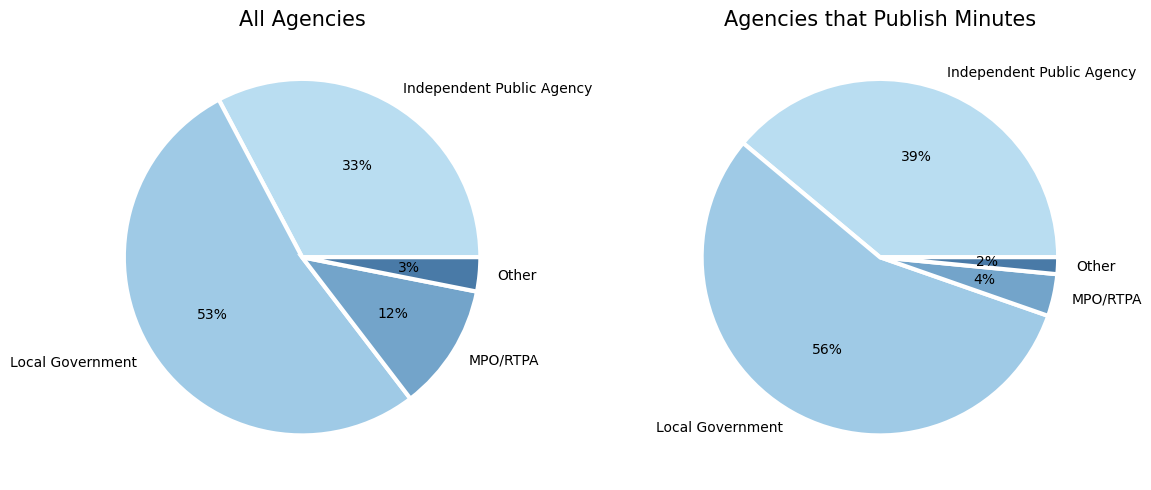

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

plt.subplot(121)
plt.pie(transit_minutes['OrgType'].value_counts().sort_index(), 
    labels = transit_minutes['OrgType'].value_counts().sort_index().index.tolist(), 
    autopct='%.0f%%', 
    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },
    colors = ["#B9DDF1", "#9FCAE6", "#73A4CA", "#497AA7", "#2E5B88"])
plt.title('All Agencies', fontsize = 15)

plt.subplot(122)
plt.pie(responded['OrgType'].value_counts().sort_index(), 
    labels = responded['OrgType'].value_counts().sort_index().index.tolist(), 
    autopct='%.0f%%', 
    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },
    colors = ["#B9DDF1", "#9FCAE6", "#73A4CA", "#497AA7", "#2E5B88"])
plt.title('Agencies that Publish Minutes', fontsize = 15)


plt.tight_layout()

plt.savefig('Desktop/Firmographs type of agency.jpg', dpi = 300)

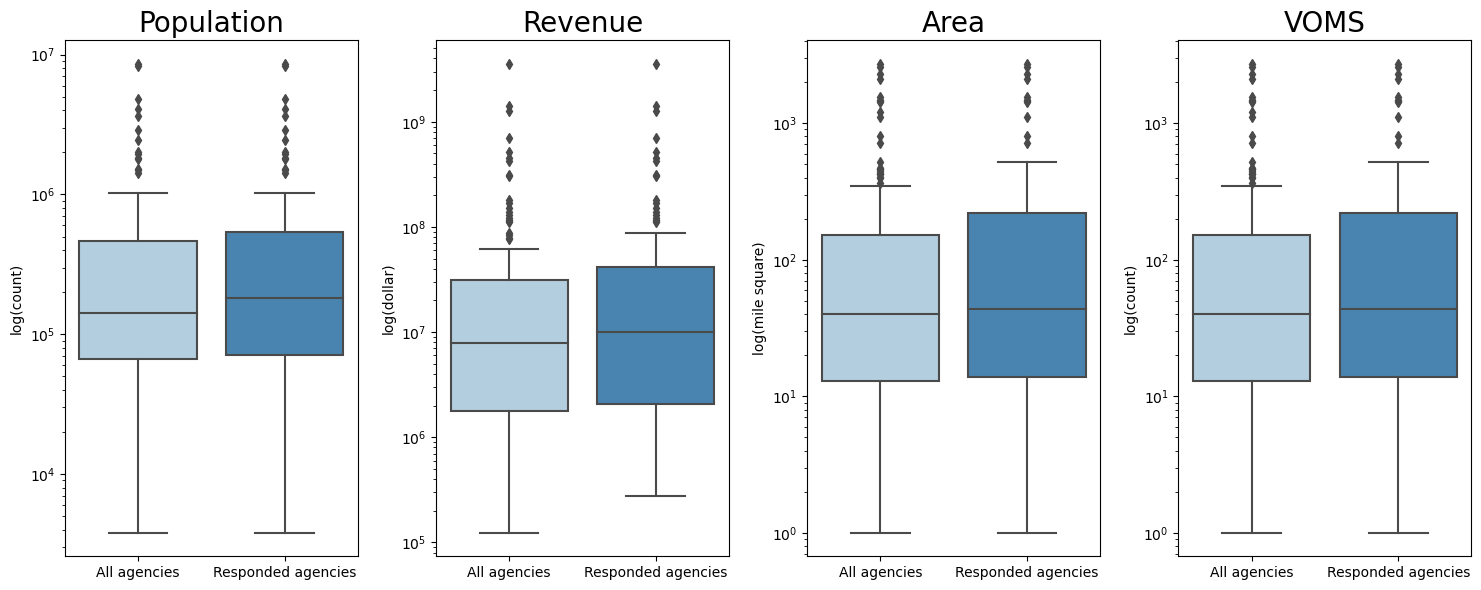

In [24]:
fig, axes = plt.subplots(1, 4, figsize=(15, 6))

plt.subplot(141)
pop = pd.concat([transit_minutes['pop'].reset_index(drop = True).rename('All agencies'),
                 responded['pop'].reset_index(drop = True).rename('Responded agencies')], axis = 1)
                #  no_response['pop'].reset_index(drop = True).rename('No_response')], axis = 1)
sns.boxplot(data = pop, palette="Blues")
plt.title('Population', fontsize = 20)
plt.ylabel('log(count)')
plt.yscale('log')

plt.subplot(142)
rev = pd.concat([transit_minutes['revenue'].reset_index(drop = True).rename('All agencies'),
                 responded['revenue'].reset_index(drop = True).rename('Responded agencies')], axis = 1)
                #  no_response['pop'].reset_index(drop = True).rename('No_response')], axis = 1)
sns.boxplot(data = rev, palette="Blues")
plt.title('Revenue', fontsize = 20)
plt.ylabel('log(dollar)')
plt.yscale('log')

plt.subplot(143)
mile = pd.concat([transit_minutes['mile'].reset_index(drop = True).rename('All agencies'),
                 responded['mile'].reset_index(drop = True).rename('Responded agencies')], axis = 1)
                #  no_response['pop'].reset_index(drop = True).rename('No_response')], axis = 1)
sns.boxplot(data = mile, palette="Blues")
plt.title('Area', fontsize = 20)
plt.ylabel('log(mile square)')
plt.yscale('log')

plt.subplot(144)
voms = pd.concat([transit_minutes['VOMS'].reset_index(drop = True).rename('All agencies'),
                 responded['VOMS'].reset_index(drop = True).rename('Responded agencies')], axis = 1)
                #  no_response['pop'].reset_index(drop = True).rename('No_response')], axis = 1)
sns.boxplot(data = mile, palette="Blues")
plt.title('VOMS', fontsize = 20)
plt.ylabel('log(count)')
plt.yscale('log')

plt.tight_layout()

plt.savefig('Desktop/Minutes agencies size.jpg', dpi = 300)

In [25]:
# Note that only NTD reporters have attributes (pop, mile, VOMS, revenue)

log_meta = np.log(transit_minutes[['pop', 'mile', 'VOMS', 'revenue']]).dropna()
log_meta[['minutes']] = transit_minutes[['minutes']]
log_meta

/Users/ishanaratan/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,pop,mile,VOMS,revenue,minutes
1,14.169875,5.897154,6.677083,20.069671,1
2,11.327668,2.079442,2.708050,14.453757,1
4,15.225205,3.332205,3.526361,17.497859,1
6,12.788288,3.912023,4.343805,16.648162,0
7,12.762970,7.090077,4.304065,17.333171,0
...,...,...,...,...,...
218,11.586492,2.772589,2.079442,14.079199,1
219,10.471298,0.693147,2.302585,14.517015,1
220,11.080988,2.995732,3.912023,16.251056,1
222,13.178517,4.691348,3.912023,16.701106,1


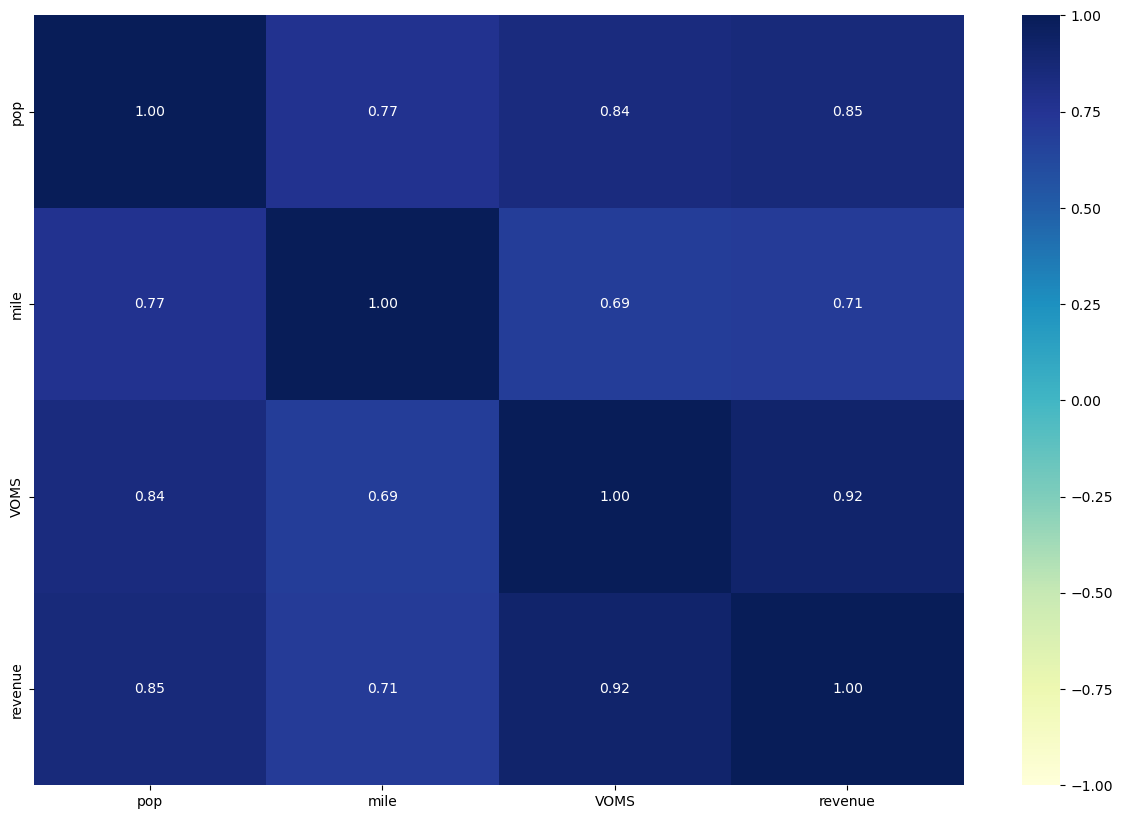

In [27]:
#correlation table
plt.figure(figsize=[15, 10])
corr_matrix = log_meta[['pop','mile', 'VOMS', 'revenue']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", vmin=-1, vmax=1, fmt = '.2f')

plt.savefig('Desktop/correlation matrix all.jpg', dpi = 300)
plt.show()